#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


In [93]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn

In [94]:
# SP500 complete
start=datetime.datetime(1992, 1, 2)
end=datetime.datetime(2013, 1, 1)

#end=datetime.datetime(2013, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end, period = "1d", prepost=False)


In [95]:
print(SP500.index)

DatetimeIndex(['1992-01-02', '1992-01-03', '1992-01-06', '1992-01-07',
               '1992-01-08', '1992-01-09', '1992-01-10', '1992-01-13',
               '1992-01-14', '1992-01-15',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5291, freq=None)


In [96]:
print(len(SP500.index)*0.995)

5264.545


In [97]:
# Get Sector Data from Wikipedia
payload=pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&oldid=530268767')

#payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)
print(sectors, df["Ticker symbol"])
df["Symbol"] = df["Ticker symbol"]

{'Energy', 'Materials', 'Financials', 'Consumer Staples', 'Consumer Discretionary', 'Utilities', 'Telecommunications Services', 'Information Technology', 'Industrials', 'Health Care'} 0       MMM
1       ABT
2       ANF
3       ACE
4       ACN
       ... 
495     XYL
496    YHOO
497     YUM
498     ZMH
499    ZION
Name: Ticker symbol, Length: 500, dtype: object


In [98]:
print(sectors,df)

{'Energy', 'Materials', 'Financials', 'Consumer Staples', 'Consumer Discretionary', 'Utilities', 'Telecommunications Services', 'Information Technology', 'Industrials', 'Health Care'}     Ticker symbol                        Company SEC filings  \
0             MMM                         3M Co.     reports   
1             ABT            Abbott Laboratories     reports   
2             ANF  Abercrombie & Fitch Company A     reports   
3             ACE                    ACE Limited     reports   
4             ACN                      Accenture     reports   
..            ...                            ...         ...   
495           XYL                     Xylem Inc.     reports   
496          YHOO                     Yahoo Inc.     reports   
497           YUM                Yum! Brands Inc     reports   
498           ZMH                Zimmer Holdings     reports   
499          ZION                  Zions Bancorp     reports   

                GICS Sector  Address of Headqua

In [99]:
NumberOfCompanies = 0

#### Fill almost complete Time Series

If a Time Series is not complete, but has more than 99.5% of the data: just interpolate the missing values by setting them equal to the previous value.

In [100]:
SPmissing =  yf.Ticker("^GSPC").history(start = start, end = end, period = "1d", prepost=False)


In [101]:
SPmissing = SPmissing.drop(SPmissing.index[99])
SPmissing =  SPmissing.drop(SPmissing.index[99])
SPmissing =  SPmissing.drop(SPmissing.index[1000])
SPmissing =  SPmissing.drop(SPmissing.index[5000])
print(SPmissing.index)

DatetimeIndex(['1992-01-02', '1992-01-03', '1992-01-06', '1992-01-07',
               '1992-01-08', '1992-01-09', '1992-01-10', '1992-01-13',
               '1992-01-14', '1992-01-15',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5287, freq=None)


In [102]:
Missing = list(set(SP500.index) - set(SPmissing.index))
Missing = sorted(Missing)
print(Missing)

[Timestamp('1992-05-22 00:00:00'), Timestamp('1992-05-26 00:00:00'), Timestamp('1995-12-18 00:00:00'), Timestamp('2011-11-07 00:00:00')]


In [103]:
print(SPmissing)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1992-01-02   417.029999   417.269989   411.040009   417.260010   207570000   
1992-01-03   417.269989   419.790009   416.160004   419.339996   224270000   
1992-01-06   419.309998   419.440002   416.920013   417.959991   251210000   
1992-01-07   417.959991   417.959991   415.200012   417.399994   252780000   
1992-01-08   417.359985   420.230011   415.019989   418.100006   290750000   
...                 ...          ...          ...          ...         ...   
2012-12-24  1430.150024  1430.150024  1424.660034  1426.660034  1248960000   
2012-12-26  1426.660034  1429.420044  1416.430054  1419.829956  2285030000   
2012-12-27  1419.829956  1422.800049  1401.800049  1418.099976  2830180000   
2012-12-28  1418.099976  1418.099976  1401.579956  1402.430054  2426680000   
2012-12-31  1402.430054  1426.739990  1398.109985  1426.189941  

In [104]:
for i in Missing:
    print(i)
    print(SP500.loc[i])
    SPmissing.loc[i] = np.nan 
SPmissing = SPmissing.sort_index()
print(SPmissing)

1992-05-22 00:00:00
Open            4.126100e+02
High            4.148200e+02
Low             4.126000e+02
Close           4.140200e+02
Volume          1.467100e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1992-05-22 00:00:00, dtype: float64
1992-05-26 00:00:00
Open            4.140200e+02
High            4.140200e+02
Low             4.102300e+02
Close           4.114100e+02
Volume          1.977000e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1992-05-26 00:00:00, dtype: float64
1995-12-18 00:00:00
Open            6.163400e+02
High            6.163400e+02
Low             6.061300e+02
Close           6.068100e+02
Volume          4.262700e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 1995-12-18 00:00:00, dtype: float64
2011-11-07 00:00:00
Open            1.253210e+03
High            1.261700e+03
Low             1.240750e+03
Close           1.261120e+03
Volume          3.429740e+09
Dividends       0.000000e+00
Stock Split

In [105]:
print(SPmissing.iloc[[99,100,1002,5003]])

            Open  High  Low  Close  Volume  Dividends  Stock Splits
Date                                                               
1992-05-22   NaN   NaN  NaN    NaN     NaN        NaN           NaN
1992-05-26   NaN   NaN  NaN    NaN     NaN        NaN           NaN
1995-12-18   NaN   NaN  NaN    NaN     NaN        NaN           NaN
2011-11-07   NaN   NaN  NaN    NaN     NaN        NaN           NaN


In [106]:
SPmissing["Close"].interpolate().iloc[[99,100,1002,5003]]

Date
1992-05-22     412.456675
1992-05-26     412.313344
1995-12-18     614.135010
2011-11-07    1264.575012
Name: Close, dtype: float64

In [107]:
print(SPmissing["Close"].iloc[95:105])

Date
1992-05-18    412.809998
1992-05-19    416.369995
1992-05-20    415.390015
1992-05-21    412.600006
1992-05-22           NaN
1992-05-26           NaN
1992-05-27    412.170013
1992-05-28    416.739990
1992-05-29    415.350006
1992-06-01    417.299988
Name: Close, dtype: float64


In [108]:
print(SPmissing["Close"].interpolate("nearest").iloc[95:105])

Date
1992-05-18    412.809998
1992-05-19    416.369995
1992-05-20    415.390015
1992-05-21    412.600006
1992-05-22    412.600006
1992-05-26    412.170013
1992-05-27    412.170013
1992-05-28    416.739990
1992-05-29    415.350006
1992-06-01    417.299988
Name: Close, dtype: float64


In [109]:
def Interpolate(DS, index):
    # takes pandas Series DS with some missing closing data and returns an interpolation for all
    # elements which are in index but not in DS.index
    Output = DS.copy()
    
    missing = set(index)-set(DS.index)
    
    for i in missing:
        Output.loc[i] = np.nan # add missing value
    Output = Output.sort_index() # sorting
    return(Output.interpolate("nearest"))

In [110]:
Interpolate(SPmissing["Close"], SP500.index)

Date
1992-01-02     417.260010
1992-01-03     419.339996
1992-01-06     417.959991
1992-01-07     417.399994
1992-01-08     418.100006
                 ...     
2012-12-24    1426.660034
2012-12-26    1419.829956
2012-12-27    1418.099976
2012-12-28    1402.430054
2012-12-31    1426.189941
Name: Close, Length: 5291, dtype: float64

In [111]:
CompaniesDF = pd.DataFrame({})
CompaniesDF.index = SP500.index
print(CompaniesDF)

Empty DataFrame
Columns: []
Index: [1992-01-02 00:00:00, 1992-01-03 00:00:00, 1992-01-06 00:00:00, 1992-01-07 00:00:00, 1992-01-08 00:00:00, 1992-01-09 00:00:00, 1992-01-10 00:00:00, 1992-01-13 00:00:00, 1992-01-14 00:00:00, 1992-01-15 00:00:00, 1992-01-16 00:00:00, 1992-01-17 00:00:00, 1992-01-20 00:00:00, 1992-01-21 00:00:00, 1992-01-22 00:00:00, 1992-01-23 00:00:00, 1992-01-24 00:00:00, 1992-01-27 00:00:00, 1992-01-28 00:00:00, 1992-01-29 00:00:00, 1992-01-30 00:00:00, 1992-01-31 00:00:00, 1992-02-03 00:00:00, 1992-02-04 00:00:00, 1992-02-05 00:00:00, 1992-02-06 00:00:00, 1992-02-07 00:00:00, 1992-02-10 00:00:00, 1992-02-11 00:00:00, 1992-02-12 00:00:00, 1992-02-13 00:00:00, 1992-02-14 00:00:00, 1992-02-18 00:00:00, 1992-02-19 00:00:00, 1992-02-20 00:00:00, 1992-02-21 00:00:00, 1992-02-24 00:00:00, 1992-02-25 00:00:00, 1992-02-26 00:00:00, 1992-02-27 00:00:00, 1992-02-28 00:00:00, 1992-03-02 00:00:00, 1992-03-03 00:00:00, 1992-03-04 00:00:00, 1992-03-05 00:00:00, 1992-03-06 00:00:00

In [112]:
def SectorNormReturns(sec,df, start, end, lag):
    global NumberOfCompanies
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from 
    # start to endhich have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    Counter = 0 # how many "valid" time series?
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end, period = "1d")
        StockData = StockData["Close"]
        print(sym,len(StockData.index), len(StockData.index) == len(SP500.index))
        
        
        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):
            
            Counter +=1
            
            
            # calculate returns via difference operator and an index shift
            StockShifted = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            StockShifted.index = StockData.index[1:(len(StockData))]
            StockData = (StockData.diff()/StockShifted) 
        
            # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            #print(sym, PlusOutput)

            Output = Output.add(PlusOutput)
            CompaniesDF[sym] = PlusOutput
            
        # if the data is incomplete, but almost complete    
        elif len(StockData.index) > 0.995*len(SP500.index): 
            
            # Interpolate the data
            StockData = Interpolate(StockData, SP500.index)
                        
            Counter +=1
            
            
            # calculate returns via difference operator and an index shift
            StockShifted = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            StockShifted.index = StockData.index[1:(len(StockData))]
            StockData = (StockData.diff()/StockShifted) 
        
            # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            #print(sym, PlusOutput)

            Output = Output.add(PlusOutput)
            CompaniesDF[sym] = PlusOutput
            
            
    NumberOfCompanies += Counter    
    print(Counter)   
    return(Output)

In [113]:
def NormSectorReturns(sec,df, start, end, lag):
    global NumberOfCompanies
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from
    # start to end which have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    # DIFFERENCE TO ABOVE: FRIST add all of the sector's companies Time Series, then calculate the sector returns + normalise

    Counter = 0 # how many "valid" time series?

    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series

    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector



    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end, period = "1d")
        StockData = StockData["Close"]
        print(sym,len(StockData.index), len(StockData.index) > 0.995*len(SP500.index))


        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):

            Counter +=1
            Output =Output.add(StockData)
            CompaniesDF[sym] = StockData

        # if the data is incomplete, but almost complete
        elif len(StockData.index) > 0.995*len(SP500.index):

            # Interpolate the data
            StockData = Interpolate(StockData, SP500.index)

            Counter +=1
            Output =Output.add(StockData)
            CompaniesDF[sym] = StockData

    # calutlate the sector's returns
    OutputShifted = pd.Series(Output.iloc[0:(len(Output)-1)])
    OutputShifted.index = Output.index[1:]
    OutputReturns = (Output.diff() / OutputShifted)


    # Shift the new data (again...) to calculate the average of the last "lag" returns before current date
    OutputShiftLag = pd.Series(Output.iloc[0:(len(Output)-1)])
    OutputShiftLag.index = Output.index[1:]
    RenormalisedOutput = (Output - OutputShiftLag.rolling(lag).mean()) / OutputShiftLag.rolling(lag).std()


    NumberOfCompanies += Counter
    return(RenormalisedOutput)

In [114]:
# Normalizes returns

NormRetDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    print(len(SectorDF["Symbol"]))
    
    #Seclist.append(SectorPrices(s, start, end))
    #NormRetDF[s] = SectorNormReturns(s, df,start, end, 13)
    NormRetDF[s] = NormSectorReturns(s, df,start, end, 13)



Energy
41
- APC: No data found, symbol may be delisted
APC 0 False
APA 5291 True
- BHI: Data doesn't exist for startDate = 694306800, endDate = 1356994800
BHI 0 False
- COG: No data found, symbol may be delisted
COG 0 False
- CAM: No data found for this date range, symbol may be delisted
CAM 0 False
- CHK: Data doesn't exist for startDate = 694306800, endDate = 1356994800
CHK 0 False
CVX 5291 True
COP 5291 True
CNX 3440 False
- DNR: No data found, symbol may be delisted
DNR 0 False
DVN 5291 True
- DO: No data found, symbol may be delisted
DO 0 False
- ESV: No data found, symbol may be delisted
ESV 0 False
EOG 5291 True
XOM 5291 True
FTI 2903 False
HAL 5291 True
HP 5291 True
HES 5291 True
KMI 474 False
MRO 5291 True
MPC 382 False
MUR 5291 True
NBR 5291 True
NOV 4070 False
NFX 4806 False
- NE: Data doesn't exist for startDate = 694306800, endDate = 1356994800
NE 0 False
- NBL: No data found, symbol may be delisted
NBL 0 False
OXY 5291 True
- BTU: Data doesn't exist for startDate = 694306

/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


BBBY 5183 False
BBY 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


BIG 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


HRB 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


BWA 4882 False
- CVC: No data found for this date range, symbol may be delisted
CVC 0 False
KMX 4003 False
CCL 5291 True
- CBS: No data found, symbol may be delisted
CBS 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CMG 1745 False
- COH: Data doesn't exist for startDate = 694306800, endDate = 1356994800
COH 0 False
CMCSA 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


DHI 5183 False
DRI 4444 False
- DLPH: No data found, symbol may be delisted
DLPH 0 False
- DTV: No data found, symbol may be delisted
DTV 0 False
DISCA 1884 False
DG 787 False
DLTR 4488 False
EXPE 1875 False
- FDO: No data found for this date range, symbol may be delisted
FDO 0 False
F 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


FOSL 4970 False
GME 2740 False
- GCI: Data doesn't exist for startDate = 694306800, endDate = 1356994800
GCI 0 False
GPS 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


GRMN 3032 False
GPC 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


GT 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


HOG 5291 True
- HAR: Data doesn't exist for startDate = 694306800, endDate = 1356994800
HAR 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


HAS 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


HD 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


IGT 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


IPG 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


JCI 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


KSS 5195 False
LEG 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


LEN 5291 True
- LTD: No data found for this date range, symbol may be delisted
LTD 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


LOW 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


M 5267 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


MAR 3719 False
MAT 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


MCD 5291 True
MHP 274 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


NWL 5291 True
- NWSA: Data doesn't exist for startDate = 694306800, endDate = 1356994800
NWSA 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


NKE 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


JWN 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ORLY 4960 False
OMC 5291 True
- JCP: No data found, symbol may be delisted
JCP 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- PETM: Data doesn't exist for startDate = 694306800, endDate = 1356994800
PETM 0 False
RL 3914 False
PHM 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ROST 5291 True
SNI 1147 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


SHW 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


SNA 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


SWK 5291 True
- SPLS: No data found for this date range, symbol may be delisted
SPLS 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


SBUX 5168 False
- HOT: No data found for this date range, symbol may be delisted
HOT 0 False
TGT 5291 True
- TIF: No data found, symbol may be delisted
TIF 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


TWX 5225 False
- TWC: No data found for this date range, symbol may be delisted
TWC 0 False
TJX 5291 True
TRIP 267 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


URBN 4821 False
VFC 5291 True
- VIAB: No data found, symbol may be delisted
VIAB 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


DIS 5291 True
- WPO: No data found for this date range, symbol may be delisted
WPO 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


WHR 5291 True
- WYN: No data found for this date range, symbol may be delisted
WYN 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


WYNN 2563 False
YUM 3847 False
Utilities
33
AES 5291 True
GAS 135 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


AEE 3773 False
AEP 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CNP 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CMS 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ED 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


D 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


DTE 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


DUK 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


EIX 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ETR 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


EQT 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


EXC 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


FE 3809 False
- TEG: Data doesn't exist for startDate = 694306800, endDate = 1356994800
TEG 0 False
NEE 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


NI 5291 True
- NU: Data doesn't exist for startDate = 694306800, endDate = 1356994800
NU 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


NRG 2286 False
OKE 5291 True
POM 681 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PCG 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PNW 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PPL 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PEG 5291 True
- QEP: No data found, symbol may be delisted
QEP 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- SCG: Data doesn't exist for startDate = 694306800, endDate = 1356994800
SCG 0 False
SRE 3651 False
SO 5291 True
- TE: No data found for this date range, symbol may be delisted
TE 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


WEC 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


XEL 5291 True
Telecommunications Services
8


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


T 5291 True
- CTL: No data found, symbol may be delisted
CTL 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CCI 3616 False
- FTR: No data found, symbol may be delisted
FTR 0 False
- PCS: No data found for this date range, symbol may be delisted
PCS 0 False
- S: Data doesn't exist for startDate = 694306800, endDate = 1356994800
S 0 False
VZ 5291 True
- WIN: No data found, symbol may be delisted
WIN 0 False
Information Technology
68


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ACN 2880 False
ADBE 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


AMD 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


AKAM 3313 False
- ALTR: Data doesn't exist for startDate = 694306800, endDate = 1356994800
ALTR 0 False
ADI 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


AAPL 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


AMAT 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ADSK 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ADP 5291 True
BMC 135 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- BRCM: No data found for this date range, symbol may be delisted
BRCM 0 False
CA 5287 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CSCO 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CTXS 4295 False
CTSH 3657 False
CSC 135 False
- DELL: Data doesn't exist for startDate = 694306800, endDate = 1356994800
DELL 0 False
EBAY 3590 False
EA 5291 True
EMC 22 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


FFIV 3416 False
FIS 2900 False
FISV 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- FLIR: No data found, symbol may be delisted
FLIR 0 False
GOOG 2107 False
- HRS: No data found, symbol may be delisted
HRS 0 False
HPQ 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


INTC 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


IBM 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


INTU 4989 False
JBL 4954 False
- JDSU: No data found for this date range, symbol may be delisted
JDSU 0 False
JNPR 3401 False
KLAC 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


LRCX 5291 True
- LLTC: No data found for this date range, symbol may be delisted
LLTC 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


LSI 4414 False
MA 1662 False
MCHP 4984 False
MU 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


MSFT 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- MOLX: No data found for this date range, symbol may be delisted
MOLX 0 False
MSI 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


NTAP 4307 False
NFLX 2671 False
NVDA 3509 False
ORCL 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PAYX 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


QCOM 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- RHT: No data found, symbol may be delisted
RHT 0 False
- SAI: No data found for this date range, symbol may be delisted
SAI 0 False
CRM 2147 False
- SNDK: No data found for this date range, symbol may be delisted
SNDK 0 False
STX 2531 False
- SYMC: No data found, symbol may be delisted
SYMC 0 False
TEL 1398 False
TDC 1323 False
TER 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


TXN 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- TSS: No data found, symbol may be delisted
TSS 0 False
VRSN 3754 False
V 1206 False
WDC 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


WU 1573 False
XRX 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


XLNX 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- YHOO: No data found for this date range, symbol may be delisted
YHOO 0 False
Industrials
61
MMM 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- ADT: Data doesn't exist for startDate = 694306800, endDate = 1356994800
ADT 0 False
APH 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


AVY 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


BA 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CHRW 3826 False
CAT 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CTAS 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


GLW 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CSX 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CMI 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


DHR 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


DE 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


DOV 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- DNB: Data doesn't exist for startDate = 694306800, endDate = 1356994800
DNB 0 False
ETN 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


EMR 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


EXPD 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


FAST 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


FDX 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


FSLR 1539 False
FLS 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


FLR 3037 False
GD 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


GE 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


GWW 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


HON 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ITW 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- IR: Data doesn't exist for startDate = 694306800, endDate = 1356994800
IR 0 False
IRM 4258 False
- JEC: No data found, symbol may be delisted
JEC 0 False
- JOY: No data found for this date range, symbol may be delisted
JOY 0 False
- LLL: Data doesn't exist for startDate = 694306800, endDate = 1356994800
LLL 0 False
LMT 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


MAS 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


NSC 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


NOC 5294 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PCAR 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- PLL: Data doesn't exist for startDate = 694306800, endDate = 1356994800
PLL 0 False
PH 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PNR 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PBI 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- PCP: Data doesn't exist for startDate = 694306800, endDate = 1356994800
PCP 0 False
- PCLN: No data found for this date range, symbol may be delisted
PCLN 0 False
PWR 3745 False
- RTN: No data found, symbol may be delisted
RTN 0 False
RSG 3649 False
RHI 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ROK 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


COL 121 False
ROP 5261 False
R 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


LUV 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


SRCL 4116 False
TXT 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- TYC: No data found for this date range, symbol may be delisted
TYC 0 False
UNP 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


UPS 3305 False
- UTX: No data found, symbol may be delisted
UTX 0 False
WM 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


XYL 305 False
Health Care
52
ABT 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


AET 4291 False
A 3299 False
- ALXN: No data found, symbol may be delisted
ALXN 0 False
- AGN: No data found, symbol may be delisted
AGN 0 False
ABC 4468 False
AMGN 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- BCR: No data found for this date range, symbol may be delisted
BCR 0 False
BAX 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


BDX 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


BIIB 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


BSX 5195 False
BMY 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CAH 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- CFN: No data found for this date range, symbol may be delisted
CFN 0 False
- CELG: No data found, symbol may be delisted
CELG 0 False
CERN 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


CI 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


- CVH: Data doesn't exist for startDate = 694306800, endDate = 1356994800
CVH 0 False
- COV: No data found for this date range, symbol may be delisted
COV 0 False
DVA 4322 False
XRAY 5292 True


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


EW 3211 False
ESRX 5172 False
- FRX: No data found, symbol may be delisted
FRX 0 False
GILD 5277 True
- HSP: No data found for this date range, symbol may be delisted
HSP 0 False


/tmp/ipykernel_2253557/4176462810.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


HUM 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


ISRG 3154 False
JNJ 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


LH 5291 True
- LIFE: Data doesn't exist for startDate = 694306800, endDate = 1356994800
LIFE 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


LLY 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


MCK 4567 False
MDT 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


MRK 5291 True
- MYL: No data found, symbol may be delisted
MYL 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PDCO 5082 False
PKI 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PRGO 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


PFE 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


DGX 4036 False
- STJ: No data found for this date range, symbol may be delisted
STJ 0 False
SYK 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


THC 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


TMO 5291 True


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


UNH 5291 True
- VAR: No data found, symbol may be delisted
VAR 0 False


/tmp/ipykernel_2253557/4176462810.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CompaniesDF[sym] = StockData


WAT 4309 False
WPI 3218 False
- WLP: No data found for this date range, symbol may be delisted
WLP 0 False
- ZMH: No data found for this date range, symbol may be delisted
ZMH 0 False


In [115]:
print(NumberOfCompanies)

249


In [116]:
NormRetDF.to_csv("NormalisedSectorReturns.csv")

In [117]:
print(NormRetDF)

              Energy  Materials  Financials  Consumer Staples  \
Date                                                            
1992-01-02       NaN        NaN         NaN               NaN   
1992-01-03       NaN        NaN         NaN               NaN   
1992-01-06       NaN        NaN         NaN               NaN   
1992-01-07       NaN        NaN         NaN               NaN   
1992-01-08       NaN        NaN         NaN               NaN   
...              ...        ...         ...               ...   
2012-12-24 -0.155057   1.385747    0.915809         -2.050516   
2012-12-26 -0.271327   1.354208    0.456098         -3.382103   
2012-12-27 -0.509202   0.887343    0.106018         -2.366387   
2012-12-28 -1.407916  -0.036272   -0.628374         -3.036650   
2012-12-31  0.150999   1.363142    0.372896         -1.091596   

            Consumer Discretionary  Utilities  Telecommunications Services  \
Date                                                                        

In [118]:
print(NormRetDF)

              Energy  Materials  Financials  Consumer Staples  \
Date                                                            
1992-01-02       NaN        NaN         NaN               NaN   
1992-01-03       NaN        NaN         NaN               NaN   
1992-01-06       NaN        NaN         NaN               NaN   
1992-01-07       NaN        NaN         NaN               NaN   
1992-01-08       NaN        NaN         NaN               NaN   
...              ...        ...         ...               ...   
2012-12-24 -0.155057   1.385747    0.915809         -2.050516   
2012-12-26 -0.271327   1.354208    0.456098         -3.382103   
2012-12-27 -0.509202   0.887343    0.106018         -2.366387   
2012-12-28 -1.407916  -0.036272   -0.628374         -3.036650   
2012-12-31  0.150999   1.363142    0.372896         -1.091596   

            Consumer Discretionary  Utilities  Telecommunications Services  \
Date                                                                        

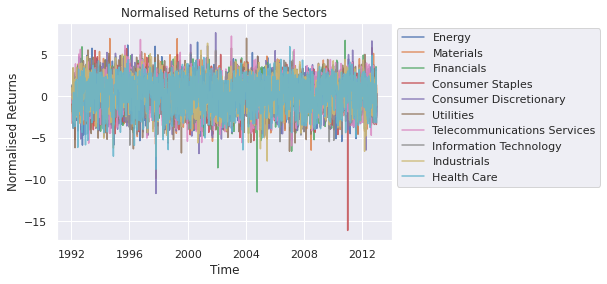

In [119]:
import seaborn as sns
sns.set()

for i in NormRetDF.columns:
    plt.plot(NormRetDF[i], label=i, alpha = 0.85)

plt.legend(bbox_to_anchor=(1, 1))
plt.title("Normalised Returns of the Sectors")
plt.xlabel("Time")
plt.ylabel("Normalised Returns")
plt.savefig("SectorReturns.pdf",bbox_inches='tight',dpi=300)
plt.show()

In [124]:
print(CompaniesDF.shape)
CompaniesDF.to_csv("CompaniesStocks.csv")
CompaniesDF.head()

(5291, 249)


,APA,CVX,COP,DVN,EOG,XOM,HAL,HP,HES,MRO,...,LLY,MDT,MRK,PKI,PRGO,PFE,SYK,THC,TMO,UNH
Date,,,,,,,,,,,,,,,,,,,,,
1992-01-02,4.819200,5.664615,3.557870,3.089731,1.841979,5.622416,4.350014,1.958523,11.008553,3.224646,...,8.770188,3.898283,9.758222,7.716903,12.030217,2.703786,4.854735,40.423100,11.259748,1.899478
1992-01-03,4.780338,5.716020,3.557870,3.178011,1.829939,5.634130,4.243047,1.934343,11.178351,3.241267,...,8.770188,4.013558,9.904853,7.776725,12.768913,2.691718,4.803633,39.801216,11.168457,2.044846
1992-01-06,4.702604,5.633774,3.466644,3.178011,1.793822,5.587276,3.993456,1.922253,11.263249,3.041804,...,8.731443,4.071053,9.809541,7.736849,13.085498,2.671599,4.905839,42.599728,11.229319,2.073921
1992-01-07,4.469420,5.520687,3.375417,3.089731,1.649352,5.552134,3.833003,1.910164,10.584059,2.991939,...,8.821856,3.955638,9.780216,7.796669,12.663390,2.719882,4.829185,43.221622,11.168457,2.054538
1992-01-08,4.391690,5.489847,3.338926,3.089731,1.637314,5.481856,3.797348,1.922253,10.046366,2.875586,...,8.976855,3.861206,9.780216,7.816609,12.663390,2.707810,4.803633,42.288784,11.320614,2.057768


## Some Data Analysis

In [121]:
Corr = NormRetDF.corr()

for i in Corr.columns:
    print(np.mean(Corr[i]),i)

Corr

0.3349682234128487 Energy
0.5123874856871958 Materials
0.5377318823096033 Financials
0.4831283959462371 Consumer Staples
0.5700176986220085 Consumer Discretionary
0.4128041004622075 Utilities
0.38458050329143334 Telecommunications Services
0.4808707254940902 Information Technology
0.5899238562012322 Industrials
0.4993916073382721 Health Care


,Energy,Materials,Financials,Consumer Staples,Consumer Discretionary,Utilities,Telecommunications Services,Information Technology,Industrials,Health Care
Energy,1.000000,0.380789,0.239649,0.165286,0.309823,0.277455,0.118615,0.293440,0.337853,0.226773
Materials,0.380789,1.000000,0.490684,0.410512,0.607876,0.323603,0.260044,0.511249,0.691211,0.447907
Financials,0.239649,0.490684,1.000000,0.513687,0.627324,0.422233,0.409166,0.471948,0.672346,0.530281
Consumer Staples,0.165286,0.410512,0.513687,1.000000,0.560971,0.393962,0.376135,0.328250,0.526067,0.556413
Consumer Discretionary,0.309823,0.607876,0.627324,0.560971,1.000000,0.342023,0.336145,0.604138,0.747458,0.564418
Utilities,0.277455,0.323603,0.422233,0.393962,0.342023,1.000000,0.399281,0.245815,0.375781,0.347888
Telecommunications Services,0.118615,0.260044,0.409166,0.376135,0.336145,0.399281,1.000000,0.268460,0.365919,0.312039
Information Technology,0.293440,0.511249,0.471948,0.328250,0.604138,0.245815,0.268460,1.000000,0.629909,0.455500
Industrials,0.337853,0.691211,0.672346,0.526067,0.747458,0.375781,0.365919,0.629909,1.000000,0.552696
Health Care,0.226773,0.447907,0.530281,0.556413,0.564418,0.347888,0.312039,0.455500,0.552696,1.000000


In [122]:

print(NormRetDF.tail())

              Energy  Materials  Financials  Consumer Staples  \
Date                                                            
2012-12-24 -0.155057   1.385747    0.915809         -2.050516   
2012-12-26 -0.271327   1.354208    0.456098         -3.382103   
2012-12-27 -0.509202   0.887343    0.106018         -2.366387   
2012-12-28 -1.407916  -0.036272   -0.628374         -3.036650   
2012-12-31  0.150999   1.363142    0.372896         -1.091596   

            Consumer Discretionary  Utilities  Telecommunications Services  \
Date                                                                         
2012-12-24               -0.468294   0.083789                    -1.569582   
2012-12-26               -2.163483  -1.516068                    -1.439234   
2012-12-27               -1.208648  -1.576431                    -1.350895   
2012-12-28               -2.366320  -2.584174                    -2.470347   
2012-12-31                0.339846  -0.540745                    -1.014717  

Energy  Materials  Financials  Consumer Staples  \
Date
2012-12-24 -0.155057   1.385743    0.915807         -2.050501
2012-12-26 -0.271321   1.354210    0.456094         -3.382087
2012-12-27 -0.509202   0.887341    0.106022         -2.366405
2012-12-28 -1.407925  -0.036269   -0.628376         -3.036645
2012-12-31  0.151004   1.363146    0.372894         -1.091603

            Consumer Discretionary  Utilities  Telecommunications Services  \
Date
2012-12-24               -0.468296   0.083791                    -1.569627
2012-12-26               -2.163484  -1.516077                    -1.439208
2012-12-27               -1.208650  -1.576422                    -1.350900
2012-12-28               -2.366318  -2.584176                    -2.470365
2012-12-31                0.339847  -0.540749                    -1.014720

            Information Technology  Industrials  Health Care
Date
2012-12-24                0.526978     0.836018    -0.457769
2012-12-26               -0.048467     0.458958    -1.303236
2012-12-27               -0.344796     0.259510    -1.604453
2012-12-28               -1.897725    -1.140783    -3.199392
2012-12-31                0.110974     1.004850    -0.892310